In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from textblob import TextBlob

In [4]:
from pymongo import MongoClient

client = MongoClient()

db = client.twitter_db
tweets_db = db["covid0703"]

In [5]:
normal_db = db["streaming_crawler_1003"]

In [256]:
from helpers import parse_tweet, get_body, tokenize, find_sentiment_tb

## Grouping tweets by sentiment

## Sentiment analysis

In [ ]:
from text_analysis import sentiment_analysis, add_sentiment_to_db

In [ ]:
(negative, neutral, positive), ids = sentiment_analysis(tweets_db.find())

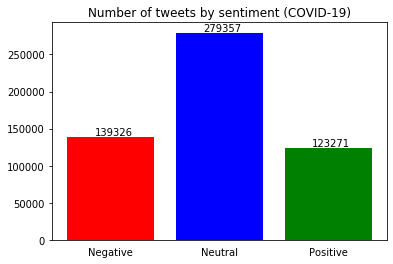

In [293]:
bars = plt.bar([-1, 0, 1], [len(scores[scores==-1]), len(scores[scores==0]), len(scores[scores==1])],
       color=["r", "b", "g"], tick_label=["Negative", "Neutral", "Positive"])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    )
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.255, yval + 2500, yval)
plt.title("Number of tweets by sentiment (COVID-19)")
plt.show()

### Example tweets

In [ ]:
add_sentiment_to_db(np.array(negative, neutral, positive), ids, tweets_db)

In [298]:
parse_tweet(tweets_db.find_one({"sentiment": -1}))

'"If I show up to an arena and there ain\'t no fans in there, I ain\'t playing."\n\nLeBron on possibly playing NBA games without any fans in attendance due to coronavirus outbreak. https://t.co/Ee5XMQ40X6'

In [299]:
parse_tweet(tweets_db.find_one({"sentiment": 0}))

'@nytimes Handwashing, I agree. How about trade in and consumption of wild animals + climate change + long-running cuts to health care systems? https://t.co/D2ejsKQ7Gq'

In [302]:
parse_tweet(tweets_db.find_one({"sentiment": 1, "entities.hashtags": []}))

'did y’all know that there are 96,950 cases of COVID-19 right now?\n\nDid y’all know 3,308 people have died from it?\n\nBUT did y’all know that 53,981 of these cases have already recovered?\n\nStop letting the media control your brain. Scare tactics are real tactics. Do your research.'

## Extract important usernames; hashtags and entities/concepts from the group

Mention can't get immediate retweets because this is streaming, so there wouldn't have been any retweets replies etc. it's static, best to look at retweeted.

In [257]:
from tweet_statistics import extract_top_entities 

In [261]:
mc, rc, hc, top_20 = extract_top_entities(tweets_db.find({"sentiment": -1}))

In [365]:
{k: v for k, v in sorted(rc.items(), key=lambda item: item[1], reverse=True)}

{'LizSpecht': 52848496,
 'tedlieu': 40525260,
 'WhySharksMatter': 6874512,
 '_SJPeace_': 5450694,
 'realDonaldTrump': 3720591,
 'BTS_twt': 3274199,
 'elonmusk': 3022184,
 'kobebryant': 2673165,
 'charliekirk11': 2611175,
 'BrianKarem': 2032150,
 'RyanSesselman': 1999062,
 'BarackObama': 1807538,
 'rahm3sh': 1739486,
 'francismmaxwell': 1733145,
 'AOC': 1500949,
 'RidiculousDak': 1460862,
 'RepAdamSchiff': 1438526,
 'its_riccaa': 1361803,
 'iamlgndfrvr': 1296863,
 'gtconway3d': 1266017,
 'funder': 1260279,
 'MrBeastYT': 1180583,
 'RealJamesWoods': 1159342,
 'Wendys': 1133702,
 'Louis_Tomlinson': 1111865,
 'summer95': 1103415,
 'yuqheis': 1093173,
 'ChrisEvans': 1087113,
 'chandlarschmidt': 1081217,
 'dearorlandoroye': 1078906,
 'tayallard': 1040554,
 'HillaryClinton': 1025730,
 'ahmxdmayed': 994503,
 'Kinglrg_': 980724,
 'S11E11B11A': 967156,
 'tribelaw': 927290,
 'ItsProxcey': 898260,
 'ezraklein': 880299,
 'RyanAFournier': 862982,
 'ChrisMurphyCT': 855674,
 'toriavaa': 845750,
 'Dough

In [275]:
h = [user + ": " + str(hashtag) for user, hashtag in sorted(top_20, key=lambda item: item[1], reverse=True)[:10]]

In [276]:
', '.join(h)

'coronavirus: 46819, covid: 34082, people: 31885, trump: 16416, due: 12318, need: 11825, one: 11354, risk: 9770, us: 9565, let: 9341'

In [366]:
{k: v for k, v in sorted(mc.items(), key=lambda item: item[1], reverse=True)}

{'realDonaldTrump': 10234,
 'elonmusk': 5617,
 'tedlieu': 5603,
 'POTUS': 5520,
 'LizSpecht': 5474,
 'ayoair': 3837,
 '_alicejay': 2200,
 'whatchidid': 2130,
 'SJimons': 2087,
 'BernieSanders': 1819,
 'BrianKarem': 1807,
 'WhySharksMatter': 1328,
 'futureking57': 985,
 'stephenslynell': 954,
 'PhilipKorthals': 932,
 'Nimueh6': 922,
 'ezraklein': 920,
 'Chris_09765': 920,
 'am_juelz': 895,
 'tiger4me': 883,
 'cschans61': 874,
 'queeneleanorj': 872,
 'RjohnsonRod': 819,
 'kurizmatik': 816,
 'JZarif': 790,
 'Familyjoool': 784,
 'JonnyShiraz': 777,
 'brokenNotRecord': 773,
 'spacedChi': 763,
 'blumosquedesign': 754,
 'Devilishlydo': 749,
 'BleacherReport': 744,
 'godemogo': 742,
 'allforCHANEL': 736,
 'CalverLauren': 729,
 'PlutonianNight': 715,
 'bjbetty8459': 714,
 'Channel4News': 703,
 'BenMoull': 700,
 'EdBagleyed': 677,
 '__GroovyGal__': 672,
 'SethEBryant': 667,
 'DaveTMpls': 666,
 'MrX_UNI': 649,
 'itsAmber_123': 649,
 'MlleKatMichele': 649,
 'DeannaG33': 647,
 'creechan': 645,
 'Ol

In [362]:
{k: v for k, v in sorted(hc.items(), key=lambda item: item[1], reverse=True)}

{'covid19': 12594,
 'coronavirus': 10955,
 'covidー19': 2187,
 'coronavirusoutbreak': 1748,
 'china': 479,
 'covid': 344,
 'coronavirusinsa': 337,
 'covid_19': 324,
 'coronaviruschallenge': 320,
 'coronavirususa': 306,
 'taiwan': 275,
 'maga': 246,
 'taipei': 246,
 'wuhan': 236,
 'trump': 224,
 'breaking': 221,
 'trump2020': 217,
 'nigeria': 214,
 'kag': 199,
 'kag2020': 194,
 'saturdaythoughts': 183,
 'coronavirussa': 171,
 'auspol': 168,
 'washyourhands': 161,
 'grandprincess': 161,
 'iran': 156,
 'italy': 155,
 'thisweekend': 152,
 'dstv403': 152,
 'saturdaymorning': 150,
 'travel': 147,
 'coronaoutbreak': 140,
 'corona': 137,
 'usa': 136,
 'sarscov2': 134,
 'coronvirusuk': 129,
 'voteforbernie': 127,
 'supertuesday': 117,
 'coroavirus': 109,
 'coronavid19': 103,
 'onevoice1': 102,
 'covid19lagos': 101,
 'coronavirusupdate': 98,
 'tcot': 98,
 'foxandfriends': 97,
 'ccot': 97,
 'washington': 95,
 'us': 95,
 'celebrateholiinvedicstyle': 95,
 'notmeus': 94,
 'daddysgurlpantacy': 92,
 'm

In [273]:
top_20

[('coronavirus', 46819),
 ('covid', 34082),
 ('people', 31885),
 ('trump', 16416),
 ('due', 12318),
 ('need', 11825),
 ('one', 11354),
 ('risk', 9770),
 ('us', 9565),
 ('let', 9341),
 ('getting', 9336),
 ('panic', 9066),
 ('hands', 8363),
 ('think', 8010),
 ('stop', 7961),
 ('sick', 7473),
 ('spread', 7327),
 ('test', 7313),
 ('testing', 7302),
 ('way', 7300)]

## Statistics on groups

In [ ]:
from statistics import number_of, get_char_count

In [303]:
number_of(tweets_db, condition=1)

Total tweets in collection: 123271
93130 retweets
29031 quotes
7799 replies


In [304]:
number_of(tweets_db, condition=0)

Total tweets in collection: 279357
204810 retweets
63975 quotes
19854 replies


In [305]:
number_of(tweets_db, condition=-1)

Total tweets in collection: 139326
115776 retweets
35773 quotes
5609 replies


In [307]:
get_char_count(tweets_db.find({"sentiment": -1}))

Average character length is: 185


In [308]:
get_char_count(tweets_db.find({"sentiment": 0}))

Average character length is: 145


In [309]:
get_char_count(tweets_db.find({"sentiment": 1}))

Average character length is: 168


In [211]:
get_char_count(tweets_db.find())

Average character length is: 160


## Capturing & organising user information in an interaction graph

In [249]:
from networks import user_interaction, get_network_information

In [251]:
from networks import hashtag_interaction

ImportError: cannot import name 'hashtag_interaction'

In [82]:
networks = user_interaction(tweets_db.find({"sentiment": 1}))

In [17]:
import networkx as nx

In [77]:
def analyse_networks(networks):
    types = ["General", "Retweet", "Quote"]
    i = 0
    for n in networks:
        G = nx.DiGraph()
        for user, friends in n.items():
            for f, m in friends.items():
                G.add_edge(user, f, weight=m)
        print(types[i])
        get_network_information(G)
        i += 1
        print()
    
    # further on: add triad/tie analysis 

In [83]:
analyse_networks(networks)

General
Number of nodes: 32712
Number of edges: 50874
Number of subgraphs: 1480
Average group size: 22

Retweet
Number of nodes: 65924
Number of edges: 74068
Number of subgraphs: 3087
Average group size: 21

Quote
Number of nodes: 21562
Number of edges: 20630
Number of subgraphs: 2461
Average group size: 8



In [ ]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=0.28)
nx.draw_networkx_nodes(G,pos=pos,node_size=500,node_color='white')
nx.draw_networkx_edges(G,pos=pos,edge_alpha=0.7,)
nx.draw_networkx_labels(G,pos=pos)
plt.show()

## Capturing & organising hashtag information in an interaction graph

In [144]:
nm = networks[0]

In [145]:
nm

{'hal1858': {'SecPompeo': 2},
 'MarySchmid2': {'MDHealthDept': 1},
 'qazzar': {'NCDCgov': 2},
 'SlimJim2123': {'AP': 1},
 'CalBearAud': {'SortaBad': 1, 'jtbourne': 1},
 'scyllex_': {'MDHealthDept': 1},
 'lovelyrita911': {'MDHealthDept': 1},
 'bodymindconsult': {'CreakyJoints': 1, 'DawnMGibson': 1},
 'WakoJoel': {'WorldBank': 2, 'ChannelNewsAsia': 1},
 'electrotech11': {'VP': 1, 'realDonaldTrump': 2},
 'wmmtver': {'POTUS': 1,
  'realDonaldTrump': 1,
  'VP': 1,
  'Mike_Pence': 1,
  'WhiteHouse': 1},
 'UMich_Buckeye': {'VP': 1, 'realDonaldTrump': 1},
 'CoveryFire': {'realDonaldTrump': 1, 'IngrahamAngle': 1},
 'NorWestIslander': {'GovInslee': 2},
 'macharoesink': {'NCDCgov': 2, 'WHO': 1},
 'JerryEugene': {'NCDCgov': 1,
  'ProfAkinAbayomi': 1,
  'jidesanwoolu': 1,
  'drobafemihamzat': 1,
  'AfricaCDC': 1,
  'WHO': 1,
  'Oreoluwa_Finnih': 1,
  'Riddwane': 1},
 'jpglutting': {'famulare_mike': 1},
 'Krishan_Dhiman': {'GoogleIndia': 1, 'bing': 1, 'MoHFW_INDIA': 1},
 '_Weather_Boy_': {'HealthyFl

In [231]:
hashtags = hashtag_interaction(tweets_db.find({"sentiment": -1}))

In [232]:
G = nx.Graph()
for hl in hashtags:
    for hashtag in hl:
        G.add_node(hashtag)
        for h2 in hl:
            if hashtag != h2:
                G.add_edge(hashtag, h2)

In [236]:
get_network_information(G)

Number of nodes: 9442
Number of edges: 21601
Number of subgraphs: 3016
Average group size: 3


In [240]:
visited = []
for hl in hashtags:
    for h in hl:
        if h not in visited:
            visited.append(h)
len(visited)

9442

KeyboardInterrupt: 

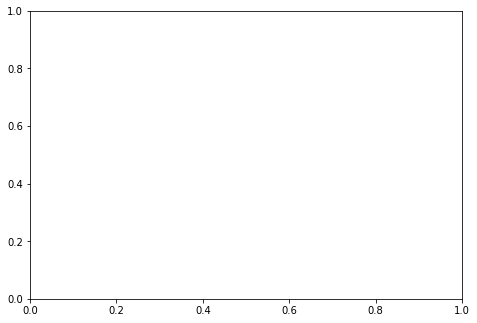

In [239]:
nx.draw(G.subgraph(max(nx.connected_components(G), key=len)))

In [227]:
test = networks[1]

In [ ]:
from networks import user_network_statistics, hashtag_network_statistics

In [228]:
ties = 0
triads = 0
transitive = 0
links = 0
visited = set()
for user, friends in test.items():
    if len(friends)==2:
        triads += 1
    elif len(friends) > 2:
        triads += sum(1 for ignore in itertools.combinations(friends, 3))
    for friend in friends:
        links += 1
        if test.get(friend):
            if test[friend].get(user):
                if (user, friend) not in visited:
                    ties += 1
                    transitive += len(test[friend])
                    if len(test[friend]) > 2:
                        triads += sum(1 for ignore in itertools.combinations(test[friend], 3))
                    else:
                        triads += 1
        visited.add((user, friend))
        visited.add((friend, user))

In [229]:
ties, triads, transitive, links

(201, 910288075, 6739, 74068)

In [211]:
visited

{('SecPompeo', 'hal1858'),
 ('SecPompeo', 'test'),
 ('hal1858', 'SecPompeo'),
 ('test', 'SecPompeo')}

In [241]:
ties = 0
visited = []
triads = 0
for tag_list in hashtags:
    # single used hashtags aren't used in conjuction with others
    if len(tag_list) > 1:
        # we don't want to count duplicates ties or triads
        if tag_list not in visited:
            if len(tag_list) > 1:
                if len(tag_list) >= 2:
                    ties += sum(1 for ignore in itertools.combinations(tag_list, 2))
                if len(tag_list) > 2:
                    triads += sum(1 for ignore in itertools.combinations(tag_list, 3))
            for h in tag_list:
                for other in tag_list:
                    if h != other:
                        for visited_list in visited:
                            if other in visited_list:
                                triads += len(visited_list)-1
            visited.append(tag_list)

In [142]:
G = nx.DiGraph()
for user, friends in networks[0].items():
    for f, m in friends.items():
        G.add_edge(user, f, weight=m)

In [244]:
nx.triadic_census(G.to_directed())

{'003': 140049180875,
 '012': 0,
 '102': 197689798,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 3036179,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 50428}

In [230]:
nx.triadic_census(G)

{'003': 5831882352686,
 '012': 1606196902,
 '102': 392321,
 '021D': 2976362,
 '021U': 21641019,
 '021C': 4785,
 '111D': 15,
 '111U': 55,
 '030T': 3847,
 '030C': 0,
 '201': 0,
 '120D': 7,
 '120U': 120,
 '120C': 0,
 '210': 1,
 '300': 0}